[np.float64(1.5)]
[np.float64(2.2868430519057195), np.float64(2.6619534805320706)]
[np.float64(2.55120346756221)]
[np.float64(3.074057218206279), np.float64(3.456028790104384), np.float64(3.718710524127129)]
[np.float64(3.3307995706985625), np.float64(3.8179969617392278)]
[np.float64(3.60240693512442)]
[np.float64(3.7314233053492503), np.float64(4.098563578503809), np.float64(4.3836428135736725), np.float64(4.805757349558505)]
[np.float64(3.9287423328868414), np.float64(4.426728482679659), np.float64(4.700480739249608)]
[np.float64(4.172357064850045), np.float64(4.766548595110308)]
[np.float64(4.448664966447911)]
[np.float64(1.4)]
[np.float64(2.3499999999999996), np.float64(2.5)]
[np.float64(2.1500000000000004)]
[np.float64(3.2999999999999994), np.float64(3.4), np.float64(3.55)]
[np.float64(3.1), np.float64(3.3500000000000005)]
[np.float64(2.9)]
[np.float64(4.040000000000001), np.float64(4.3149999999999995), np.float64(4.39), np.float64(4.465000000000001)]
[np.float64(3.84), np.float64

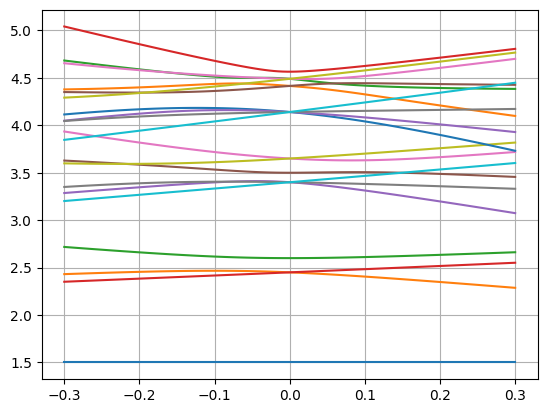

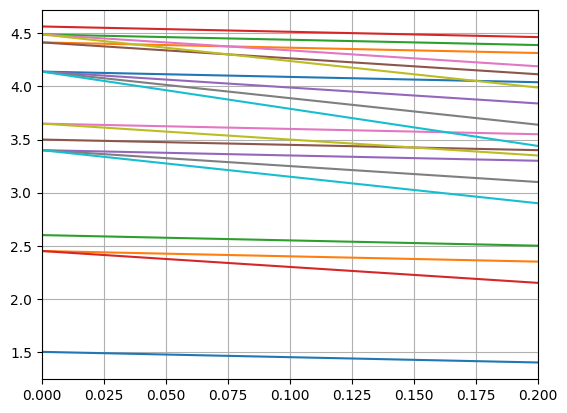

In [1]:
from math import factorial
import numpy as np
from matplotlib import pyplot as plt

fact = lambda x : factorial(int(x))
sqrt = lambda x : np.sqrt(abs(x))*np.sign(x)

F1 = lambda j1, j2, j3, m1, m2, m3 : sqrt(fact(j1+j2-j3)*fact(j3+j1-j2)*fact(j2+j3-j1)*(2*j3+1)/fact(j1+j2+j3+1))
F2 = lambda j1, j2, j3, m1, m2, m3 : sqrt(fact(j3+m3)*fact(j3-m3)*fact(j2+m2)*fact(j2-m2)*fact(j1+m1)*fact(j1-m1))
def F3(j1, j2, j3, m1, m2, m3):
    smax = min(j1-m1, j2+m2, j1+j2-j3)
    smin = abs(min(min(j3-j2+m1, j3-j1-m2), 0))
    ans = 0
    for s in np.arange(smin, smax+1):
        ans += (-1)**s/(fact(j1-m1-s)*fact(j2+m2-s)*fact(j3-j2+m1+s)*fact(j3-j1-m2+s)*fact(j1+j2-j3-s)*fact(s))
    return ans

def CG(j1, j2, j3, m1, m2, m3) :
    if not m1+m2==m3 : return 0
    if abs(m1) > j1 or abs(m2) > j2 or abs(m3) > j3 : return 0
    if j3 > j1+j2 or j3< abs(j1-j2) : return 0
    else : return F1(j1, j2, j3, m1, m2, m3)*F2(j1, j2, j3, m1, m2, m3)*F3(j1, j2, j3, m1, m2, m3)

delta = lambda x, y : int(x==y)

A = 80
kappa = 0.05
mu = [0, 0, 0, 0.35, 0.625, 0.63, 0.448, 0.434]
fdelta = lambda delta: ((1+(2/3)*delta)**2*(1-(4/3)*delta))**(-1/6)
hw0 = 1
hw00_func = lambda delta : hw0/fdelta(delta)
C_func = lambda hw : -2*kappa*hw
D_func = lambda C : [C*m/2 for m in mu]
N = 3
#hw00 = 41*A**(-1/3)
#hw0 = lambda delta: hw00*fdelta(delta)
#C = -2*kappa*hw00
#D = [C*m/2 for m in mu]

def shell_basis(N, omega):
    if omega-0.5>N : raise Exception("Omega exceeds N+0.5")
    basis_set = []
    for l in range(N, -1, -2):
        for lam in range(-l, l+1):
            sigma = omega - lam
            if sigma==.5 or sigma ==-.5 :
                basis_set.append([l, lam, sigma])
    return basis_set

def nilsson_hamiltonian(N, omega, deltaf):
    hw00 = hw00_func(deltaf)
    C = C_func(hw00)
    D = D_func(C)
    basis = shell_basis(N, omega)
    dim = len(basis)
    H = np.zeros((dim, dim))
    for i, a in enumerate(basis):
        for j, b in enumerate(basis):
            la, lb = a[0], b[0]
            lama, lamb = a[1], b[1]
            siga, sigb = a[2], b[2]
            if i==j: H[i, j] += (hw0*(N+1.5) + D[N]*la*(la+1))
            H[i, j]+= C*(.5*sqrt((la-lamb)*(la+lamb+1))*delta(lama, lamb+1)*delta(siga, sigb-1)+\
                .5*sqrt((la+lamb)*(la-lamb+1))*delta(lama, lamb-1)*delta(siga, sigb+1)+\
                    lama*siga*delta(lama, lamb)*delta(siga, sigb))*delta(la, lb)
            ex_r2 = sqrt((N-lb+2)*(N+lb+1))*delta(la, lb-2) + sqrt((N-lb)*(N+lb+3))*delta(la, lb+2) + (N+1.5)*delta(la, lb)
            ex_Y = sqrt((2*lb+1)/(2*la+1))*CG(lb, 2, la, lamb, 0, lama)*CG(lb, 2, la, 0, 0, 0)
            H[i, j] += -deltaf*hw0*(2/3)*ex_r2*ex_Y*delta(lama, lamb)*delta(siga,sigb)
    return H

def cranked_hamiltonian(N, omega, freq):
    deltaf = 0
    hw00 = hw00_func(deltaf)
    C = C_func(hw00)
    D = D_func(C)
    basis = shell_basis(N, omega)
    dim = len(basis)
    H = np.zeros((dim, dim))
    for i, a in enumerate(basis):
        for j, b in enumerate(basis):
            la, lb = a[0], b[0]
            lama, lamb = a[1], b[1]
            siga, sigb = a[2], b[2]
            if i==j: H[i, j] += hw0*(N+1.5) + D[N]*la*(la+1) - hw0*freq*omega
            H[i, j]+= C*(.5*sqrt((la-lamb)*(la+lamb+1))*delta(lama, lamb+1)*delta(siga, sigb-1)+\
                .5*sqrt((la+lamb)*(la-lamb+1))*delta(lama, lamb-1)*delta(siga, sigb+1)+\
                    lama*siga*delta(lama, lamb)*delta(siga, sigb))*delta(la, lb)
            ex_r2 = sqrt((N-lb+2)*(N+lb+1))*delta(la, lb-2) + sqrt((N-lb)*(N+lb+3))*delta(la, lb+2) + (N+1.5)*delta(la, lb)
            ex_Y = sqrt((2*lb+1)/(2*la+1))*CG(lb, 2, la, lamb, 0, lama)*CG(lb, 2, la, 0, 0, 0)
            H[i, j] += -deltaf*hw0*(2/3)*ex_r2*ex_Y*delta(lama, lamb)*delta(siga,sigb)
    return H

def plot_energy(N, omega, deltafs, type="nilsson"):

    Es = np.zeros((deltafs.shape[0], len(shell_basis(N, omega))))
    for i, deltaf in enumerate(deltafs):
        if type=="cranked" : H = cranked_hamiltonian(N, omega, deltaf)
        else : H = nilsson_hamiltonian(N, omega, deltaf)
        E = np.linalg.eigvalsh(H)
        E = sorted(E)
        Es[i, :] = E
    print(E)
    plt.plot(deltafs, Es)

plt.figure()
deltafs = np.linspace(-0.3, 0.3, 100)
for N in range(N+1) :
    for o in range(N+1) :
        omega = o + .5
        plot_energy(N, omega, deltafs)
plt.grid()
# plt.savefig('Nilsson.png')

plt.figure()
deltafs = np.linspace(0, 0.2, 100)
for N in range(N+1) :
    for o in range(N+1) :
        omega = o + .5
        plot_energy(N, omega, deltafs, "cranked")
plt.grid()
plt.xlim([0.0, 0.2])
# plt.savefig('Cranked.png')
plt.show()
